In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score , KFold
from sklearn.metrics import accuracy_score

getting information from data:

In [3]:
data = pd.read_csv("gz2sample_final.csv")
data.head()

,OBJID,RUN,RERUN,CAMCOL,FIELD,OBJ,RA,DEC,PETROR50_R,PETROR90_R,...,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,REGION,PETROR50_R_KPC_SIMPLE_BIN,PETROMAG_MR_SIMPLE_BIN,REDSHIFT_SIMPLE_BIN,WVT_BIN
0,587722981736054938,752,40,1,182,154,170.805579,-1.182146,4.486662,10.670979,...,NaN,NaN,NaN,NaN,NaN,2,-9999,-9999,-9999,0
1,587722981736120347,752,40,1,183,27,170.945892,-1.108325,13.407897,26.012415,...,NaN,NaN,NaN,NaN,NaN,2,-9999,-9999,-9999,0
2,587722981736579107,752,40,1,190,35,171.990936,-1.214009,8.175695,15.858483,...,NaN,NaN,NaN,NaN,NaN,2,-9999,-9999,-9999,0
3,587722981739069541,752,40,1,228,101,177.631858,-1.105126,2.929065,8.661545,...,NaN,NaN,NaN,NaN,NaN,2,-9999,-9999,-9999,0
4,587722981741363294,752,40,1,263,94,182.925262,-1.092357,2.695631,7.912694,...,0.016804,0.013804,0.014019,0.01994,3.973422,2,39,50,6,66


In [4]:
data.columns

Index(['OBJID', 'RUN', 'RERUN', 'CAMCOL', 'FIELD', 'OBJ', 'RA', 'DEC',
       'PETROR50_R', 'PETROR90_R', 'PETROMAG_U', 'PETROMAG_G', 'PETROMAG_R',
       'PETROMAG_I', 'PETROMAG_Z', 'PETROMAGERR_U', 'PETROMAGERR_G',
       'PETROMAGERR_R', 'PETROMAGERR_I', 'PETROMAGERR_Z', 'PSFMAG_R',
       'FIBERMAG_R', 'DEVMAG_R', 'DEVMAGERR_R', 'EXPMAG_R', 'EXPMAGERR_R',
       'FRACDEV_R', 'MU50_R', 'EXTINCTION_U', 'EXTINCTION_G', 'EXTINCTION_R',
       'EXTINCTION_I', 'EXTINCTION_Z', 'ROWC_U', 'COLC_U', 'ROWC_G', 'COLC_G',
       'ROWC_R', 'COLC_R', 'ROWC_I', 'COLC_I', 'ROWC_Z', 'COLC_Z',
       'CMODELMAG_R', 'CMODELMAGERR_R', 'REDSHIFT', 'REDSHIFTERR',
       'PETROMAG_MU', 'PETROMAG_MG', 'PETROMAG_MR', 'PETROMAG_MI',
       'PETROMAG_MZ', 'PETROMAGERR_MU', 'PETROMAGERR_MG', 'PETROMAGERR_MR',
       'PETROMAGERR_MI', 'PETROMAGERR_MZ', 'PETROR50_R_KPC', 'REGION',
       'PETROR50_R_KPC_SIMPLE_BIN', 'PETROMAG_MR_SIMPLE_BIN',
       'REDSHIFT_SIMPLE_BIN', 'WVT_BIN'],
      dtype='object')

In [ ]:
nan_counts=data.isna().sum()
nan_counts[nan_counts > 0]

REDSHIFT          27
REDSHIFTERR       27
PETROMAG_MU       27
PETROMAG_MG       27
PETROMAG_MR       27
PETROMAG_MI       27
PETROMAG_MZ       27
PETROMAGERR_MU    27
PETROMAGERR_MG    27
PETROMAGERR_MR    27
PETROMAGERR_MI    27
PETROMAGERR_MZ    27
PETROR50_R_KPC    27
dtype: int64

In [6]:
cl = data.columns
print((data[cl]==0).sum())

OBJID                         0
RUN                           0
RERUN                         0
CAMCOL                        0
FIELD                         0
                             ..
REGION                        0
PETROR50_R_KPC_SIMPLE_BIN     0
PETROMAG_MR_SIMPLE_BIN        0
REDSHIFT_SIMPLE_BIN           5
WVT_BIN                      38
Length: 63, dtype: int64


In [7]:
print(data.shape)

(200, 63)


In [8]:
data.columns

Index(['OBJID', 'RUN', 'RERUN', 'CAMCOL', 'FIELD', 'OBJ', 'RA', 'DEC',
       'PETROR50_R', 'PETROR90_R', 'PETROMAG_U', 'PETROMAG_G', 'PETROMAG_R',
       'PETROMAG_I', 'PETROMAG_Z', 'PETROMAGERR_U', 'PETROMAGERR_G',
       'PETROMAGERR_R', 'PETROMAGERR_I', 'PETROMAGERR_Z', 'PSFMAG_R',
       'FIBERMAG_R', 'DEVMAG_R', 'DEVMAGERR_R', 'EXPMAG_R', 'EXPMAGERR_R',
       'FRACDEV_R', 'MU50_R', 'EXTINCTION_U', 'EXTINCTION_G', 'EXTINCTION_R',
       'EXTINCTION_I', 'EXTINCTION_Z', 'ROWC_U', 'COLC_U', 'ROWC_G', 'COLC_G',
       'ROWC_R', 'COLC_R', 'ROWC_I', 'COLC_I', 'ROWC_Z', 'COLC_Z',
       'CMODELMAG_R', 'CMODELMAGERR_R', 'REDSHIFT', 'REDSHIFTERR',
       'PETROMAG_MU', 'PETROMAG_MG', 'PETROMAG_MR', 'PETROMAG_MI',
       'PETROMAG_MZ', 'PETROMAGERR_MU', 'PETROMAGERR_MG', 'PETROMAGERR_MR',
       'PETROMAGERR_MI', 'PETROMAGERR_MZ', 'PETROR50_R_KPC', 'REGION',
       'PETROR50_R_KPC_SIMPLE_BIN', 'PETROMAG_MR_SIMPLE_BIN',
       'REDSHIFT_SIMPLE_BIN', 'WVT_BIN'],
      dtype='object')

In [9]:
data = data.drop([
    "OBJID", "RUN", "RERUN", "CAMCOL", "FIELD",
    "ROWC_U", "COLC_U", "ROWC_G", "COLC_G",
    "COLC_R", "COLC_I", "COLC_Z", "ROWC_R",
    "ROWC_I", "ROWC_Z", "REGION", "WVT_BIN",
    "REDSHIFT_SIMPLE_BIN", "PETROMAG_MR_SIMPLE_BIN",
    "PETROR50_R_KPC_SIMPLE_BIN"
], axis=1)

data.head()

,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,...,PETROMAG_MG,PETROMAG_MR,PETROMAG_MI,PETROMAG_MZ,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,-20.75,-21.49561,-21.837368,-22.1536,0.091358,0.016804,0.013804,0.014019,0.01994,3.973422


In [10]:
data.head(15)

,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,...,PETROMAG_MG,PETROMAG_MR,PETROMAG_MI,PETROMAG_MZ,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,-20.750000,-21.495610,-21.837368,-22.153600,0.091358,0.016804,0.013804,0.014019,0.019940,3.973422
5,123,182.970108,-1.219537,3.346346,8.527256,18.523798,16.716784,15.851948,15.433319,15.155713,...,-20.799835,-21.546196,-21.915600,-22.151482,0.067919,0.012699,0.011384,0.011645,0.015903,4.071972
6,141,183.028622,-1.072705,2.589022,6.059341,18.534960,17.447456,16.872526,16.458296,16.351671,...,-21.438896,-21.929401,-22.116467,-22.309475,0.055166,0.014795,0.013081,0.013468,0.029195,5.376720
7,80,183.438095,-1.238414,3.860400,11.598755,19.545845,18.084808,17.035507,16.463684,15.881419,...,-22.180058,-23.041471,-23.488680,-24.026829,0.222632,0.034286,0.020217,0.019615,0.036172,11.628058
8,137,183.473999,-1.231429,4.134207,10.662370,17.893192,16.731045,16.146350,15.823566,15.673439,...,-21.325148,-21.832687,-22.027914,-22.187904,0.047799,0.013382,0.013150,0.012796,0.025230,6.380539
9,140,183.477783,-1.084604,2.485834,8.024713,19.621298,17.698683,16.681322,16.258665,16.043146,...,-21.005907,-21.798138,-22.170485,-22.317026,0.145955,0.018817,0.016209,0.016172,0.024657,4.587372


In [11]:
print(data.columns)
print(data.shape)

Index(['OBJ', 'RA', 'DEC', 'PETROR50_R', 'PETROR90_R', 'PETROMAG_U',
       'PETROMAG_G', 'PETROMAG_R', 'PETROMAG_I', 'PETROMAG_Z', 'PETROMAGERR_U',
       'PETROMAGERR_G', 'PETROMAGERR_R', 'PETROMAGERR_I', 'PETROMAGERR_Z',
       'PSFMAG_R', 'FIBERMAG_R', 'DEVMAG_R', 'DEVMAGERR_R', 'EXPMAG_R',
       'EXPMAGERR_R', 'FRACDEV_R', 'MU50_R', 'EXTINCTION_U', 'EXTINCTION_G',
       'EXTINCTION_R', 'EXTINCTION_I', 'EXTINCTION_Z', 'CMODELMAG_R',
       'CMODELMAGERR_R', 'REDSHIFT', 'REDSHIFTERR', 'PETROMAG_MU',
       'PETROMAG_MG', 'PETROMAG_MR', 'PETROMAG_MI', 'PETROMAG_MZ',
       'PETROMAGERR_MU', 'PETROMAGERR_MG', 'PETROMAGERR_MR', 'PETROMAGERR_MI',
       'PETROMAGERR_MZ', 'PETROR50_R_KPC'],
      dtype='object')
(200, 43)


In [12]:
nans=data.isna().sum()
print(nans[nan_counts > 0])

REDSHIFT          27
REDSHIFTERR       27
PETROMAG_MU       27
PETROMAG_MG       27
PETROMAG_MR       27
PETROMAG_MI       27
PETROMAG_MZ       27
PETROMAGERR_MU    27
PETROMAGERR_MG    27
PETROMAGERR_MR    27
PETROMAGERR_MI    27
PETROMAGERR_MZ    27
PETROR50_R_KPC    27
dtype: int64


cleaning data:

In [13]:
data["REDSHIFT"].fillna(data["REDSHIFT"].median() , inplace=True)
data["REDSHIFTERR"].fillna(data["REDSHIFTERR"].median() , inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15428\1869954172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["REDSHIFT"].fillna(data["REDSHIFT"].median() , inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15428\1869954172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [14]:
nans=data.isna().sum()
print(nans[nan_counts > 0])

REDSHIFT           0
REDSHIFTERR        0
PETROMAG_MU       27
PETROMAG_MG       27
PETROMAG_MR       27
PETROMAG_MI       27
PETROMAG_MZ       27
PETROMAGERR_MU    27
PETROMAGERR_MG    27
PETROMAGERR_MR    27
PETROMAGERR_MI    27
PETROMAGERR_MZ    27
PETROR50_R_KPC    27
dtype: int64


In [15]:
cols = ["PETROMAG_MU","PETROMAG_MG","PETROMAG_MR","PETROMAG_MI","PETROMAG_MZ","PETROMAGERR_MU","PETROMAGERR_MG","PETROMAGERR_MR","PETROMAGERR_MI","PETROMAGERR_MZ"]
data[cols].fillna(data[cols].median() , inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15428\3586062809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols].fillna(data[cols].median() , inplace=True)


In [16]:
nans=data.isna().sum()
print(nans[nan_counts > 0])

REDSHIFT           0
REDSHIFTERR        0
PETROMAG_MU       27
PETROMAG_MG       27
PETROMAG_MR       27
PETROMAG_MI       27
PETROMAG_MZ       27
PETROMAGERR_MU    27
PETROMAGERR_MG    27
PETROMAGERR_MR    27
PETROMAGERR_MI    27
PETROMAGERR_MZ    27
PETROR50_R_KPC    27
dtype: int64


In [17]:
cols_to_fill = ["PETROMAG_MU","PETROMAG_MG","PETROMAG_MR",
                "PETROMAG_MI","PETROMAG_MZ","PETROMAGERR_MU",
                "PETROMAGERR_MG","PETROMAGERR_MR","PETROMAGERR_MI",
                "PETROMAGERR_MZ","PETROR50_R_KPC"]

for col in cols_to_fill:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15428\1901166607.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15428\1901166607.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [18]:
nans=data.isna().sum()
print(nans[nan_counts > 0])

REDSHIFT          0
REDSHIFTERR       0
PETROMAG_MU       0
PETROMAG_MG       0
PETROMAG_MR       0
PETROMAG_MI       0
PETROMAG_MZ       0
PETROMAGERR_MU    0
PETROMAGERR_MG    0
PETROMAGERR_MR    0
PETROMAGERR_MI    0
PETROMAGERR_MZ    0
PETROR50_R_KPC    0
dtype: int64


In [19]:
data.head(15)

,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,...,PETROMAG_MG,PETROMAG_MR,PETROMAG_MI,PETROMAG_MZ,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,-20.899754,-21.566618,-21.895903,-22.138270,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,-20.899754,-21.566618,-21.895903,-22.138270,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,-20.899754,-21.566618,-21.895903,-22.138270,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,-20.899754,-21.566618,-21.895903,-22.138270,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,-20.750000,-21.495610,-21.837368,-22.153600,0.091358,0.016804,0.013804,0.014019,0.019940,3.973422
5,123,182.970108,-1.219537,3.346346,8.527256,18.523798,16.716784,15.851948,15.433319,15.155713,...,-20.799835,-21.546196,-21.915600,-22.151482,0.067919,0.012699,0.011384,0.011645,0.015903,4.071972
6,141,183.028622,-1.072705,2.589022,6.059341,18.534960,17.447456,16.872526,16.458296,16.351671,...,-21.438896,-21.929401,-22.116467,-22.309475,0.055166,0.014795,0.013081,0.013468,0.029195,5.376720
7,80,183.438095,-1.238414,3.860400,11.598755,19.545845,18.084808,17.035507,16.463684,15.881419,...,-22.180058,-23.041471,-23.488680,-24.026829,0.222632,0.034286,0.020217,0.019615,0.036172,11.628058
8,137,183.473999,-1.231429,4.134207,10.662370,17.893192,16.731045,16.146350,15.823566,15.673439,...,-21.325148,-21.832687,-22.027914,-22.187904,0.047799,0.013382,0.013150,0.012796,0.025230,6.380539
9,140,183.477783,-1.084604,2.485834,8.024713,19.621298,17.698683,16.681322,16.258665,16.043146,...,-21.005907,-21.798138,-22.170485,-22.317026,0.145955,0.018817,0.016209,0.016172,0.024657,4.587372


In [20]:
data.columns

Index(['OBJ', 'RA', 'DEC', 'PETROR50_R', 'PETROR90_R', 'PETROMAG_U',
       'PETROMAG_G', 'PETROMAG_R', 'PETROMAG_I', 'PETROMAG_Z', 'PETROMAGERR_U',
       'PETROMAGERR_G', 'PETROMAGERR_R', 'PETROMAGERR_I', 'PETROMAGERR_Z',
       'PSFMAG_R', 'FIBERMAG_R', 'DEVMAG_R', 'DEVMAGERR_R', 'EXPMAG_R',
       'EXPMAGERR_R', 'FRACDEV_R', 'MU50_R', 'EXTINCTION_U', 'EXTINCTION_G',
       'EXTINCTION_R', 'EXTINCTION_I', 'EXTINCTION_Z', 'CMODELMAG_R',
       'CMODELMAGERR_R', 'REDSHIFT', 'REDSHIFTERR', 'PETROMAG_MU',
       'PETROMAG_MG', 'PETROMAG_MR', 'PETROMAG_MI', 'PETROMAG_MZ',
       'PETROMAGERR_MU', 'PETROMAGERR_MG', 'PETROMAGERR_MR', 'PETROMAGERR_MI',
       'PETROMAGERR_MZ', 'PETROR50_R_KPC'],
      dtype='object')

In [24]:
data['color_new'] = data['PETROMAG_G'] - data['PETROMAG_R']

In [ ]:
def assign_morphology(row):

    if row['FRACDEV_R'] > 0.6 and row['color_new'] > 0.6:   #if fra >1...more brightness...elliptical
        return 'Elliptical'
    elif row['FRACDEV_R'] < 0.4 and row['color_new'] < 0.5:    #red=elliptical
        return 'Spiral'
    else:
        return 'Uncertain'  

data['Morphology'] = data.apply(assign_morphology, axis=1)


In [26]:
data.columns

Index(['OBJ', 'RA', 'DEC', 'PETROR50_R', 'PETROR90_R', 'PETROMAG_U',
       'PETROMAG_G', 'PETROMAG_R', 'PETROMAG_I', 'PETROMAG_Z', 'PETROMAGERR_U',
       'PETROMAGERR_G', 'PETROMAGERR_R', 'PETROMAGERR_I', 'PETROMAGERR_Z',
       'PSFMAG_R', 'FIBERMAG_R', 'DEVMAG_R', 'DEVMAGERR_R', 'EXPMAG_R',
       'EXPMAGERR_R', 'FRACDEV_R', 'MU50_R', 'EXTINCTION_U', 'EXTINCTION_G',
       'EXTINCTION_R', 'EXTINCTION_I', 'EXTINCTION_Z', 'CMODELMAG_R',
       'CMODELMAGERR_R', 'REDSHIFT', 'REDSHIFTERR', 'PETROMAG_MU',
       'PETROMAG_MG', 'PETROMAG_MR', 'PETROMAG_MI', 'PETROMAG_MZ',
       'PETROMAGERR_MU', 'PETROMAGERR_MG', 'PETROMAGERR_MR', 'PETROMAGERR_MI',
       'PETROMAGERR_MZ', 'PETROR50_R_KPC', 'color_new', 'Morphology'],
      dtype='object')

In [221]:
data.to_csv("gz2sample_final2.csv" , index=False)

In [27]:
data = data.drop("color_new" , axis=1)

In [28]:
data.head()

,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,...,PETROMAG_MR,PETROMAG_MI,PETROMAG_MZ,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,Morphology
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,-21.566618,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,Uncertain
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,-21.566618,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,Uncertain
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,-21.566618,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,Uncertain
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,-21.566618,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,Elliptical
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,-21.495610,-21.837368,-22.15360,0.091358,0.016804,0.013804,0.014019,0.019940,3.973422,Elliptical


feature engineering:

In [29]:
data["Morphology"] = data["Morphology"].str.replace("Uncertain" , "0")
data["Morphology"] = data["Morphology"].str.replace("Elliptical" , "1")
data["Morphology"] = data["Morphology"].str.replace("Spiral" , "2")

data["Morphology"] = data["Morphology"].astype(int)

In [30]:
data["Uncertain"] = (data["Morphology"]==0).astype(int)
data["Elliptical"] = (data["Morphology"]==1).astype(int)
data["Spiral"] = (data["Morphology"]==2).astype(int)

In [224]:
data.to_csv("gz2sample_final3.csv" , index=False)

In [31]:
data.head(10)

,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,...,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,Morphology,Uncertain,Elliptical,Spiral
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,0,1,0,0
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,0,1,0,0
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,0,1,0,0
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,1,0,1,0
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,0.091358,0.016804,0.013804,0.014019,0.019940,3.973422,1,0,1,0
5,123,182.970108,-1.219537,3.346346,8.527256,18.523798,16.716784,15.851948,15.433319,15.155713,...,0.067919,0.012699,0.011384,0.011645,0.015903,4.071972,1,0,1,0
6,141,183.028622,-1.072705,2.589022,6.059341,18.534960,17.447456,16.872526,16.458296,16.351671,...,0.055166,0.014795,0.013081,0.013468,0.029195,5.376720,0,1,0,0
7,80,183.438095,-1.238414,3.860400,11.598755,19.545845,18.084808,17.035507,16.463684,15.881419,...,0.222632,0.034286,0.020217,0.019615,0.036172,11.628058,1,0,1,0
8,137,183.473999,-1.231429,4.134207,10.662370,17.893192,16.731045,16.146350,15.823566,15.673439,...,0.047799,0.013382,0.013150,0.012796,0.025230,6.380539,0,1,0,0
9,140,183.477783,-1.084604,2.485834,8.024713,19.621298,17.698683,16.681322,16.258665,16.043146,...,0.145955,0.018817,0.016209,0.016172,0.024657,4.587372,1,0,1,0


In [32]:
%matplotlib qt

ax = plt.axes(projection = "3d")
ax.scatter3D(data["Spiral"] , data["Elliptical"] , data["Uncertain"])

In [38]:
data = data.drop("OBJ",axis=1)

In [39]:
data = data.drop("Spiral" , axis=1)

In [40]:
data = data.drop("Elliptical" , axis=1)

In [41]:
data = data.drop("Uncertain" , axis=1)

In [42]:
data = data.drop((["RA" , "DEC"] ), axis=1)

In [43]:
data.columns

Index(['PETROR50_R', 'PETROR90_R', 'PETROMAG_U', 'PETROMAG_G', 'PETROMAG_R',
       'PETROMAG_I', 'PETROMAG_Z', 'PETROMAGERR_U', 'PETROMAGERR_G',
       'PETROMAGERR_R', 'PETROMAGERR_I', 'PETROMAGERR_Z', 'PSFMAG_R',
       'FIBERMAG_R', 'DEVMAG_R', 'DEVMAGERR_R', 'EXPMAG_R', 'EXPMAGERR_R',
       'FRACDEV_R', 'MU50_R', 'EXTINCTION_U', 'EXTINCTION_G', 'EXTINCTION_R',
       'EXTINCTION_I', 'EXTINCTION_Z', 'CMODELMAG_R', 'CMODELMAGERR_R',
       'REDSHIFT', 'REDSHIFTERR', 'PETROMAG_MU', 'PETROMAG_MG', 'PETROMAG_MR',
       'PETROMAG_MI', 'PETROMAG_MZ', 'PETROMAGERR_MU', 'PETROMAGERR_MG',
       'PETROMAGERR_MR', 'PETROMAGERR_MI', 'PETROMAGERR_MZ', 'PETROR50_R_KPC',
       'Morphology'],
      dtype='object')

In [44]:
data.head()

,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,PETROMAGERR_U,PETROMAGERR_G,PETROMAGERR_R,...,PETROMAG_MR,PETROMAG_MI,PETROMAG_MZ,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,Morphology
0,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,0.195741,0.024320,0.020256,...,-21.566618,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,0
1,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,0.873259,0.004162,0.404917,...,-21.566618,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,0
2,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,0.110597,0.169874,0.130950,...,-21.566618,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,0
3,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,0.264240,0.024125,0.012380,...,-21.566618,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,1
4,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,0.089137,0.013505,0.009516,...,-21.495610,-21.837368,-22.15360,0.091358,0.016804,0.013804,0.014019,0.019940,3.973422,1


MODEL:

In [45]:
df = pd.read_csv("gz2sample_final3.csv")
df.head()

,OBJ,RA,DEC,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,...,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,color_new,Morphology,Uncertain,Elliptical,Spiral
0,154,170.805579,-1.182146,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,...,0.016296,0.013468,0.014121,0.024163,4.196238,0.802467,0,1,0,0
1,27,170.945892,-1.108325,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,...,0.016296,0.013468,0.014121,0.024163,4.196238,23.107110,0,1,0,0
2,35,171.990936,-1.214009,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.027797,0,1,0,0
3,101,177.631858,-1.105126,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,...,0.016296,0.013468,0.014121,0.024163,4.196238,1.306440,1,0,1,0
4,94,182.925262,-1.092357,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,...,0.016804,0.013804,0.014019,0.019940,3.973422,0.874229,1,0,1,0


In [46]:
print(df.columns)
print(df.shape)
print(df.isna().sum())

Index(['OBJ', 'RA', 'DEC', 'PETROR50_R', 'PETROR90_R', 'PETROMAG_U',
       'PETROMAG_G', 'PETROMAG_R', 'PETROMAG_I', 'PETROMAG_Z', 'PETROMAGERR_U',
       'PETROMAGERR_G', 'PETROMAGERR_R', 'PETROMAGERR_I', 'PETROMAGERR_Z',
       'PSFMAG_R', 'FIBERMAG_R', 'DEVMAG_R', 'DEVMAGERR_R', 'EXPMAG_R',
       'EXPMAGERR_R', 'FRACDEV_R', 'MU50_R', 'EXTINCTION_U', 'EXTINCTION_G',
       'EXTINCTION_R', 'EXTINCTION_I', 'EXTINCTION_Z', 'CMODELMAG_R',
       'CMODELMAGERR_R', 'REDSHIFT', 'REDSHIFTERR', 'PETROMAG_MU',
       'PETROMAG_MG', 'PETROMAG_MR', 'PETROMAG_MI', 'PETROMAG_MZ',
       'PETROMAGERR_MU', 'PETROMAGERR_MG', 'PETROMAGERR_MR', 'PETROMAGERR_MI',
       'PETROMAGERR_MZ', 'PETROR50_R_KPC', 'color_new', 'Morphology',
       'Uncertain', 'Elliptical', 'Spiral'],
      dtype='object')
(200, 48)
OBJ               0
RA                0
DEC               0
PETROR50_R        0
PETROR90_R        0
PETROMAG_U        0
PETROMAG_G        0
PETROMAG_R        0
PETROMAG_I        0
PETROMAG_Z       

In [47]:
df = df.drop(["OBJ" , "RA" , "DEC" , "Spiral" , "Elliptical" , "Uncertain"],axis=1)
df.head()

,PETROR50_R,PETROR90_R,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,PETROMAG_Z,PETROMAGERR_U,PETROMAGERR_G,PETROMAGERR_R,...,PETROMAG_MI,PETROMAG_MZ,PETROMAGERR_MU,PETROMAGERR_MG,PETROMAGERR_MR,PETROMAGERR_MI,PETROMAGERR_MZ,PETROR50_R_KPC,color_new,Morphology
0,4.486662,10.670979,19.361341,17.737705,16.935238,16.445162,16.151276,0.195741,0.024320,0.020256,...,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,0.802467,0
1,13.407897,26.012415,31.566551,37.952810,14.845700,35.954224,29.191177,0.873259,0.004162,0.404917,...,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,23.107110,0
2,8.175695,15.858483,17.994175,16.808289,15.780492,15.409781,15.245371,0.110597,0.169874,0.130950,...,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,1.027797,0
3,2.929065,8.661545,20.127234,18.129680,16.823240,16.327341,15.979728,0.264240,0.024125,0.012380,...,-21.895903,-22.13827,0.082957,0.016296,0.013468,0.014121,0.024163,4.196238,1.306440,1
4,2.695631,7.912694,19.045778,17.276037,16.401808,15.985344,15.641546,0.089137,0.013505,0.009516,...,-21.837368,-22.15360,0.091358,0.016804,0.013804,0.014019,0.019940,3.973422,0.874229,1


In [48]:
x = df.drop("Morphology" , axis=1)
y = df["Morphology"]

using feature importance:

In [83]:
x_train , x_test , y_train , y_test = train_test_split(
    x , y , random_state=159 , test_size=0.1
)

In [101]:
param = {
    "max_depth": [3, 5, 7, 9],
    "n_estimators": [50, 100, 200],
    "min_samples_leaf": [2, 4, 6],
    "min_samples_split": [4, 6, 10],
}

grid1 = GridSearchCV(
    RandomForestClassifier(),
    param,
    cv=5,
    scoring="accuracy"
)
grid1.fit(x_train , y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [2, 4, ...], 'min_samples_split': [4, 6, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [102]:
print("Best Params:", grid1.best_params_)
print("Best Score:", grid1.best_score_)

Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 50}
Best Score: 0.9055555555555556


In [103]:
model =  RandomForestClassifier( n_estimators=50 , max_depth=5 , min_samples_leaf=2 , min_samples_split=6, random_state=159)
model.fit(x_train , y_train)
importance = model.feature_importances_

In [104]:
df_importance = pd.DataFrame({
    "features": x.columns,
    "importance": importance
})
df_importance = df_importance.sort_values(by="importance" , ascending=False)
print(df_importance)

          features  importance
18       FRACDEV_R    0.255377
40       color_new    0.137676
12        PSFMAG_R    0.072423
34  PETROMAGERR_MU    0.060054
13      FIBERMAG_R    0.044725
2       PETROMAG_U    0.041690
19          MU50_R    0.034310
7    PETROMAGERR_U    0.031945
26  CMODELMAGERR_R    0.023973
0       PETROR50_R    0.022565
28     REDSHIFTERR    0.022013
33     PETROMAG_MZ    0.020563
6       PETROMAG_Z    0.019438
15     DEVMAGERR_R    0.016890
11   PETROMAGERR_Z    0.015804
32     PETROMAG_MI    0.015245
1       PETROR90_R    0.013259
14        DEVMAG_R    0.013249
3       PETROMAG_G    0.012523
31     PETROMAG_MR    0.010972
5       PETROMAG_I    0.010303
16        EXPMAG_R    0.009262
24    EXTINCTION_Z    0.008979
27        REDSHIFT    0.008663
22    EXTINCTION_R    0.007253
29     PETROMAG_MU    0.006686
4       PETROMAG_R    0.006425
10   PETROMAGERR_I    0.006374
9    PETROMAGERR_R    0.006166
35  PETROMAGERR_MG    0.005906
20    EXTINCTION_U    0.004858
8    PET

predicting with random forest:

In [105]:
rf = RandomForestClassifier(n_estimators=50 , max_depth=3 , random_state=159)
rf.fit(x_train , y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.95


In [106]:
print(y_pred)

[1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1]


gridsearch for finding the best cv for cross validation:

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

cv_values = np.arange(3, 11)  
scores = []

for cv in cv_values:
    kf = KFold(n_splits=cv, shuffle=True, random_state=159)
    score = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=kf, scoring="accuracy").mean()
    scores.append(score)
    print(f"CV={cv} : Accuracy={score:.4f}")

best_cv = cv_values[np.argmax(scores)]
print("\nBest CV:", best_cv)
print("Best Score:", max(scores))


CV=3 : Accuracy=0.9000
CV=4 : Accuracy=0.9056
CV=5 : Accuracy=0.9111
CV=6 : Accuracy=0.9056
CV=7 : Accuracy=0.9007
CV=8 : Accuracy=0.8953
CV=9 : Accuracy=0.9056
CV=10 : Accuracy=0.9167

Best CV: 10
Best Score: 0.9166666666666667


In [107]:
n_fold = 10
kf = KFold(n_splits=n_fold, shuffle=True, random_state=159)

In [108]:
cv = cross_val_score(model , x , y , cv=kf)
print(cv)

[1.   0.85 1.   0.9  0.85 0.95 0.9  0.9  0.9  0.9 ]


The ACCURACY:

In [109]:
print(cv.mean())

0.915


comparing CROSS VALIDATION and RANDOM FOREST:

In [110]:
print("cross validation:" , cv.mean())
print("random forest:" , accuracy_score(y_pred,y_test))

cross validation: 0.915
random forest: 0.95


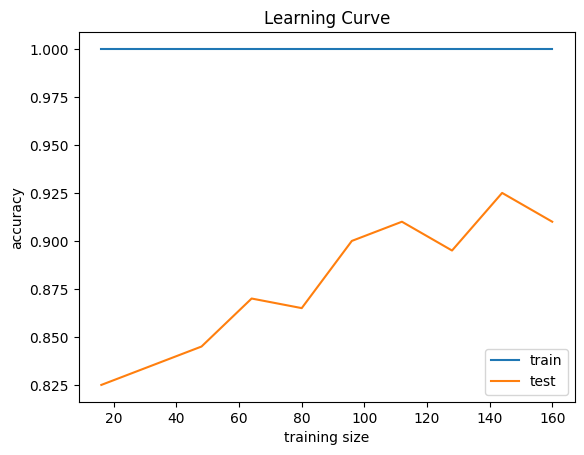

In [ ]:
from sklearn.model_selection import learning_curve
%matplotlib inline

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(random_state=42),
    x, y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="train")
plt.plot(train_sizes, test_scores_mean, label="test")
plt.legend()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.title("Learning Curve")
plt.show()

trying ut SVM:

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [119]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train_scaled , y_train)
y_pred_svc = svc.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred_svc))

0.9


In [120]:
svc2 = SVC(kernel="rbf")
svc2.fit(x_train_scaled , y_train)
y_pred_svc2 = svc2.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred_svc2))

0.95


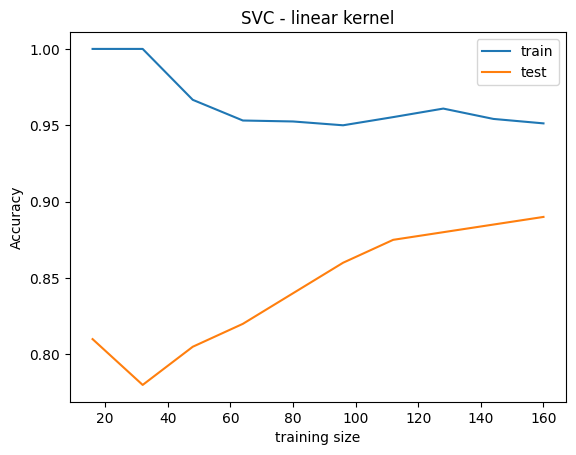

In [131]:
%matplotlib inline

train_sizes, train_scores, test_scores = learning_curve(
    svc,
    x,y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="train")
plt.plot(train_sizes, test_scores_mean, label="test")
plt.legend()
plt.xlabel("training size")
plt.ylabel("Accuracy")
plt.title("SVC - linear kernel")
plt.show()

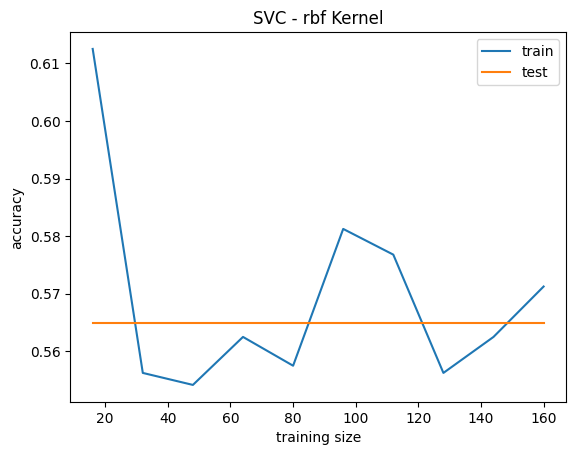

In [132]:
%matplotlib inline

train_sizes, train_scores, test_scores = learning_curve(
    svc2,
    x,y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="train")
plt.plot(train_sizes, test_scores_mean, label="test")
plt.legend()
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.title("SVC - rbf Kernel")
plt.show()

trying out KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_scaled , y_train)
y_pred_knn = knn.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred_knn))

0.95


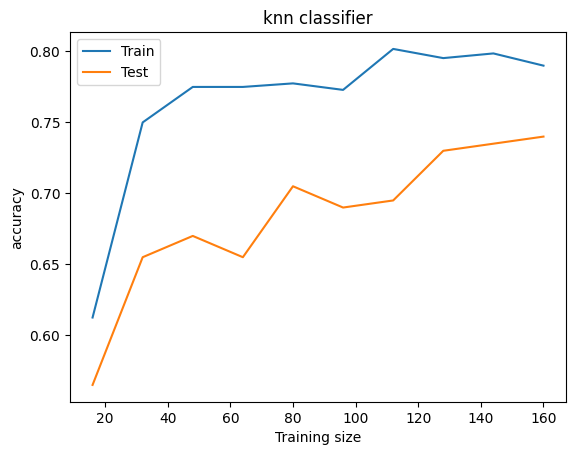

In [134]:
%matplotlib inline

train_sizes, train_scores, test_scores = learning_curve(
    knn,
    x,y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")
plt.legend()
plt.xlabel("Training size")
plt.ylabel("accuracy")
plt.title("knn classifier")
plt.show()

saving data:

In [135]:
import joblib

joblib.dump(knn , "new_galaxy.jblib")

['new_galaxy.jblib']

observing galaxy images (with object id):

In [146]:
meta = pd.read_csv("gz2sample_final.csv")
print(meta.head())

                OBJID  RUN  RERUN  CAMCOL  FIELD  OBJ          RA       DEC  \
0  587722981736054938  752     40       1    182  154  170.805579 -1.182146   
1  587722981736120347  752     40       1    183   27  170.945892 -1.108325   
2  587722981736579107  752     40       1    190   35  171.990936 -1.214009   
3  587722981739069541  752     40       1    228  101  177.631858 -1.105126   
4  587722981741363294  752     40       1    263   94  182.925262 -1.092357   

   PETROR50_R  PETROR90_R  ...  PETROMAGERR_MG  PETROMAGERR_MR  \
0    4.486662   10.670979  ...             NaN             NaN   
1   13.407897   26.012415  ...             NaN             NaN   
2    8.175695   15.858483  ...             NaN             NaN   
3    2.929065    8.661545  ...             NaN             NaN   
4    2.695631    7.912694  ...        0.016804        0.013804   

   PETROMAGERR_MI  PETROMAGERR_MZ  PETROR50_R_KPC  REGION  \
0             NaN             NaN             NaN       2   
1     

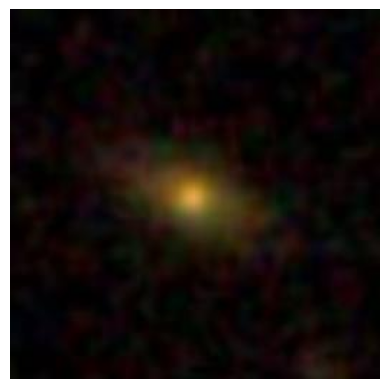

In [149]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

image_file = "images"

def show_object_image(obj_id):
    row = meta[meta["OBJID"] == obj_id]
    
    if row.empty:
        print("this object is not in the data")
        return
    
    filename = str(obj_id) + ".jpg"
    filepath = os.path.join(image_file, filename)
    
    if not os.path.exists(filepath):
        print("no image available", filepath)
        return
    
    img = Image.open(filepath)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

show_object_image(587722981736579107)

In [ ]:
import pandas as pd
print(587722981736579107.jpg.size())